In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [89]:
data=pd.read_csv("/content/Magic_Telescope_data.csv")
data.head(10)

,ID,fLen0t1:,fWidt1:,fSize:,fConc:,fConc1:,fAsym:,fM3Lon0:,fM3Trans:,fAlp1a:,fDist:,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.0920,81.8828,g
2,2.0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
3,3.0,162.0520,136.0310,4.0612,0.0374,0.0187,116.741,-64.858,-45.2160,76.9600,256.7880,g
4,4.0,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
5,5.0,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
6,6.0,51.6240,21.1502,2.9085,0.2420,0.134,50.8761,43.1887,9.8145,3.6130,238.0980,g
7,7.0,48.2468,17.3565,3.0332,0.2529,0.1515,8.573,38.0957,10.5868,4.7920,219.0870,g
8,8.0,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.456,-2.9292,0.8120,237.1340,g
9,9.0,96.2327,46.5165,4.154,0.0779,0.039,110.355,85.0486,43.1844,4.8540,248.2260,g


In [90]:
for i in range(len(data['class'])):
  if data['class'][i]=='g':
    data['class'][i]=1
  elif data['class'][i]=='h':
    data['class'][i]=0
  else:
    pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [91]:
#data= data.apply(pd.to_numeric, errors='coerce')
data=data.apply(lambda x :pd.to_numeric(x, errors ='coerce'),axis=1).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18988 entries, 1 to 19020
Data columns (total 12 columns):
ID           18988 non-null float64
fLen0t1:     18988 non-null float64
fWidt1:      18988 non-null float64
fSize:       18988 non-null float64
fConc:       18988 non-null float64
fConc1:      18988 non-null float64
fAsym:       18988 non-null float64
fM3Lon0:     18988 non-null float64
fM3Trans:    18988 non-null float64
fAlp1a:      18988 non-null float64
fDist:       18988 non-null float64
class        18988 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [0]:
data=data.iloc[:,1:]
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [0]:
x=((x)-(x).min()+1).transform(np.log)      # log transformation

In [0]:
x=np.array(x)
y=np.array(y)
y=y.reshape(-1,1)

In [0]:
x=(x-np.min(x))/(np.max(x)-np.min(x))    #Minmax normalization

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [97]:
type(x)

numpy.ndarray

In [0]:
def sigmoid(x,theta):
  z=np.array(np.dot(x,theta),dtype=np.float64)
  return 1/(1+np.exp((-z)))
theta=np.zeros((x_train.shape[1],1))

In [0]:
h=sigmoid(x_train,theta)
alpha=0.1
m=len(x_train)

In [0]:
def loss(y,y_hat):
  return -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))

In [0]:
iterations=2000
cost =[]
itera=[]
for i in range(iterations):
  h=sigmoid(x_train,theta)
  theta=theta-alpha*1/m*np.dot((x_train).T,(h-y_train))
  cost.append(loss(y_train,h))
  itera.append(i)

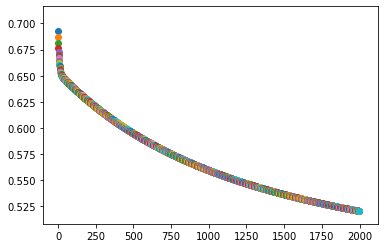

In [106]:
#Visualising the cost which should decrease
for i in range(iterations):
  plt.scatter(i,cost[i])

In [103]:
#test accuracy
out=sigmoid(x_test,theta)
c=0
for i in range(len(out)):
  if out[i]>0.5:
    out[i]=1
  else:
    out[i]=0
  if out[i]==y_test[i]:
    c+=1
print (c/out.shape[0]*100)

77.67245918904688
